# Short interest alpha (SIA)

__Description__

...

__Journal of negative results__

...

In [16]:
# imports
%run ../modules/pnl_module.ipynb
%run ../modules/objectives_module.ipynb

In [17]:
import pandas as pd
import numpy.ma as ma

### Data prepare

In [19]:
data_path = '../data/spx_dataset/{}.csv'
args = {'parse_dates' : ['Date'], 'index_col' : 'Date'}
un_returns = np.array(pd.read_csv(data_path.format('un_spx_adjusted_returns'), **args))
un_na_price = np.array(pd.read_csv(data_path.format('un_spx_daily_nonadjusted_close'), **args))
in_spx_mask = np.array(pd.read_csv(data_path.format('in_spx_mask'), **args))
si_factor = np.array(pd.read_csv(data_path.format('Features/SI_FACTOR'), **args))

print('Shapes: {}, {}, {}, {}'.format(un_returns.shape, un_na_price.shape, in_spx_mask.shape, si_factor.shape))

Shapes: (2835, 738), (2835, 738), (2835, 738), (2835, 738)


In [20]:
mask = (np.isfinite(si_factor) * (in_spx_mask==1) * np.isfinite(un_na_price)).astype('bool')
anti_mask = (1-mask).astype('bool')
un_na_price[np.isnan(un_na_price)]=10**6
un_returns[np.isnan(un_returns)]=0

### Backtest

In [21]:
_buying_power.set_value(10. ** 5)
_commis_per_share.set_value(0.01)
_nb_top.set_value(10)
_nb_bottom.set_value(10)

In [22]:
Q = np.where(anti_mask, ma.array(si_factor, mask=anti_mask).mean(axis=1, keepdims=True), si_factor)  

In [23]:
shares = quality_to_share_robust_fun(Q, un_na_price, mask)

In [24]:
strategy_returns_arr = strategy_returns_fun(shares, un_returns)

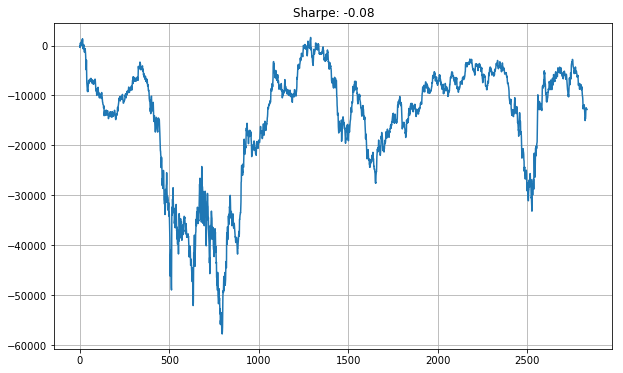

In [26]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(strategy_returns_arr.cumsum())
plt.title('Sharpe: {}'.format(round(sharpe(strategy_returns_arr), 2)))